In [27]:
# 0. Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centrods = None
        self.clusters = None

    def initialize_centroids(self, data):
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def assign_clusters(self, data):
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return  np.argmin(distances, axis=1)

    def update_centroids(self, data):
        return np.array([data[self.clusters==i].mean(axis=0) for i in range(self.k)])

    def fit(self, data):
        self.initialize_centroids(data)
        for i in range(self.max_iters):
            self.clusters = self.assign_clusters(data)
            # self.plot_clusters(data, i)
            self.new_centroids = self.update_centroids(data)
            if np.all(self.centroids == self.new_centroids):
                break
            self.centroids = self.new_centroids

        self.plot_final_clusters(data)

    def plot_clusters(self, data, iteration):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o',
        alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title(f"Iteration {iteration + 1}")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

    def plot_final_clusters(self, data):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o',
        alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title("Final Clusters and Centroids")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

In [4]:
# 1. Load dataset
from sklearn import datasets
iris_dataset = datasets.load_iris()
data = iris_dataset.data
data = iris_dataset.data[:, :2]

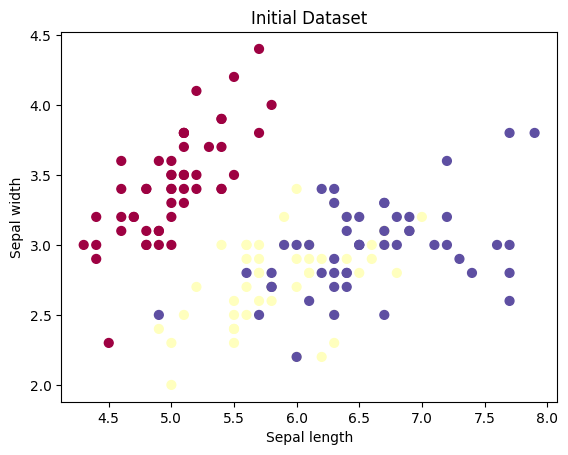

In [25]:
# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title("Initial Dataset")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

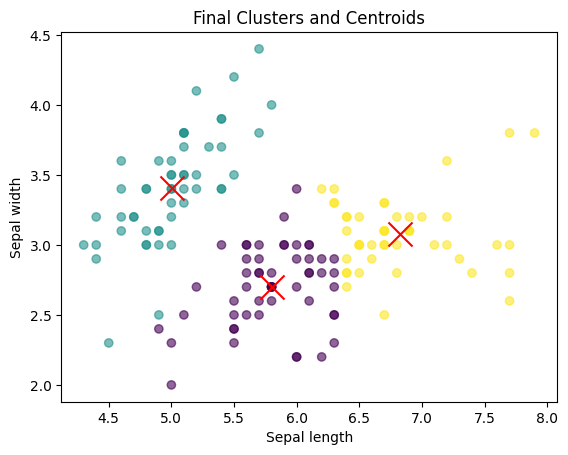

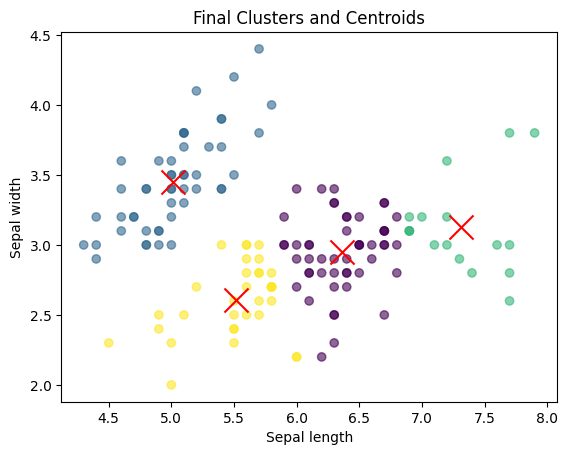

In [26]:
kmeans = KMeans(k=3)
kmeans.fit(data)
kmeans = KMeans(k=4)
kmeans.fit(data)